In [2]:
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
df = pd.read_csv('./../gcb_data/budget.csv')
df.head()

,Year,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
0,1959,2.453378,1.810588,2.0352,0.852376,0.516073,0.860316
1,1960,2.568376,1.672592,1.5052,0.819017,1.394030,0.522722
2,1961,2.579724,1.607579,1.6536,0.714842,0.605098,1.213762
3,1962,2.685099,1.566764,1.1872,0.756709,1.348349,0.959605
4,1963,2.832715,1.513809,1.2084,0.904997,0.877794,1.355333


In [4]:
year = df['Year']
ffi = df['fossil fuel and industry']
lce = df['land-use change emissions']
atmg = df['atmospheric growth']
os = df['ocean sink']
ls = df['land sink']
imb = df['budget imbalance']

## Linear regression

LinregressResult(slope=0.02879814903541788, intercept=-55.517280847692106, rvalue=0.9708966153199413, pvalue=4.5163482440701956e-37, stderr=0.0009409311183714584)

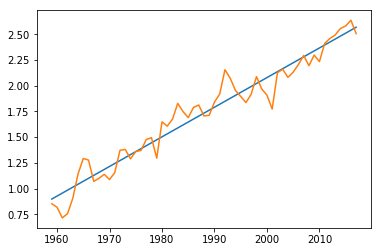

In [5]:
# Ocean sink
var = os
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.03708142333225599, intercept=-71.56437947485881, rvalue=0.5873401221753709, pvalue=1.0084452845029765e-06, stderr=0.006768001062165134)

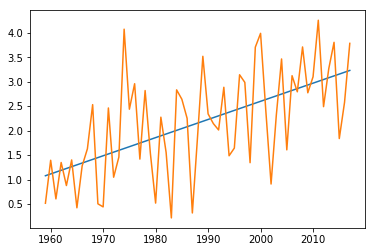

In [6]:
# Land sink
var = ls
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.0009097886015046684, intercept=-1.3650798732320626, rvalue=0.11568493871417111, pvalue=0.3829274769604688, stderr=0.0010346668593677034)

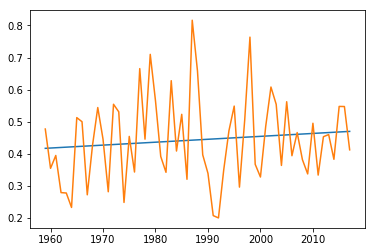

In [7]:
# Airborne fraction
airborne = atmg/(ffi+lce)
var = airborne
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.058259731151373485, intercept=-112.56165400350676, rvalue=0.7244643746871583, pvalue=8.817762035204092e-11, stderr=0.007342264187411975)

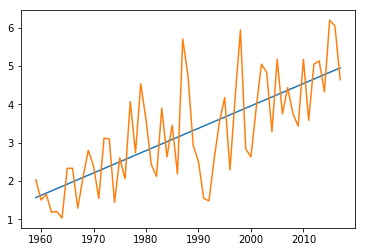

In [8]:
# Atm-growth
var = atmg
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.12167553990163064, intercept=-235.93797132919764, rvalue=0.9840470469583289, pvalue=1.9500412592768152e-44, stderr=0.0029137113000328543)

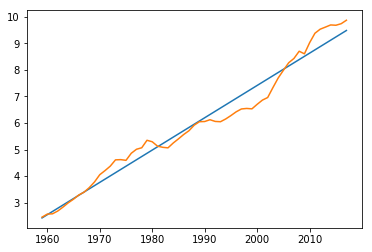

In [9]:
# Fossil-fuel emissions
var = ffi
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=-3.697913383401464e-05, intercept=1.4020978787230383, rvalue=-0.0035652741999737283, pvalue=0.9786196346799583, stderr=0.0013738003097092714)

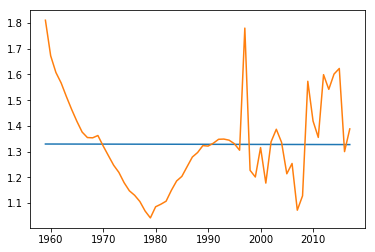

In [10]:
# Land-use change emissions
var = lce
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

## Correlation between SOI and CO2 growth rate

In [11]:
soi_df = pd.read_csv('./../soi_noaa.csv')

In [12]:
# Fix date column

date_new = []
for date in soi_df['Date']:
    date_new.append(int(str(date)[:4])+(int(str(date)[-2:])-1)/12)

soi_df.Date = date_new
soi_df.head()

,Date,Value
0,1951.000000,1.5
1,1951.083333,0.9
2,1951.166667,-0.1
3,1951.250000,-0.3
4,1951.333333,-0.7


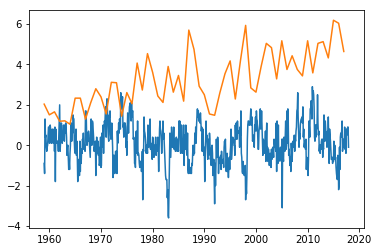

In [13]:
plt.plot(soi_df.Date[96:804], soi_df.Value[96:804])
plt.plot(year, atmg)

### Correlation between SOI index and atmospheric growth.

In [14]:
# Calculate annual mean of SOI
SOI_floor_date = np.floor(soi_df.Date)

SOI_year = []
SOI_annual_values = []
for year in range(int(np.min(SOI_floor_date)),
                  int(np.max(SOI_floor_date))
                 ):
    data_year_soi = np.mean(soi_df.Value[SOI_floor_date==year])
    SOI_year.append(year)
    SOI_annual_values.append(data_year_soi)

SOI_annual_ave = (pd
                  .DataFrame([SOI_year, SOI_annual_values],
                             index = ['Year', 'SOI']
                            )
                  .transpose()
                 )

In [15]:
np.corrcoef(SOI_annual_ave.iloc[8:-1,1], atmg)

array([[ 1.        , -0.21017956],
       [-0.21017956,  1.        ]])

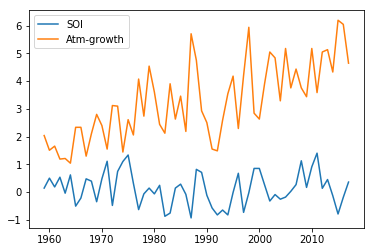

In [16]:
plt.plot(range(1959,2018), SOI_annual_ave.iloc[8:-1,1])
plt.plot(df.Year, atmg)
labels=['SOI', 'Atm-growth']
plt.legend(labels)